In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import RandomOverSampler

In [2]:
#t show a comparison between the dataset for Q3, I have used the sklearn datasets mnist dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
X_data_sklearn = mnist['data']
y_data_sklearn = mnist['target']
y_data_sklearn = y_data_sklearn.astype(np.uint8)

In [3]:
data_path = os.path.join(os.getcwd(),"train_valid.csv")
imagespixeldf = pd.read_csv(data_path,header = None)

<h2>Data Preparation</h2>

In [4]:
X_data = imagespixeldf.iloc[:,:-1]
y_data = imagespixeldf.iloc[:,-1]
y_data = np.array([int(i) for i in y_data.tolist()])
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

Text(0.5, 1.0, 'SkLearn datset')

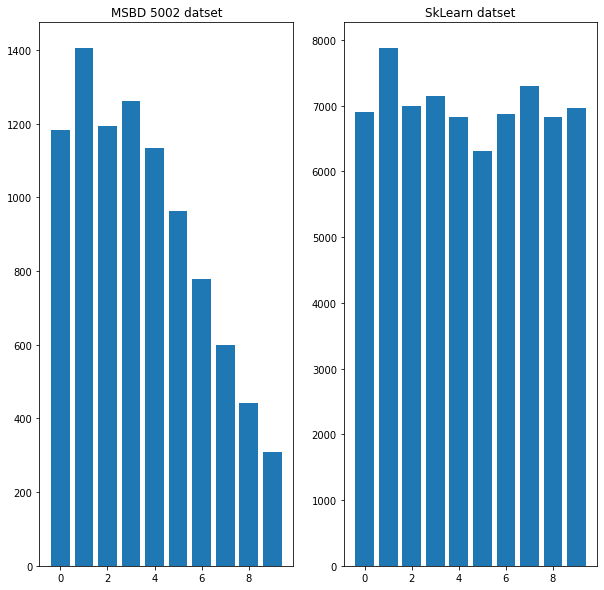

In [5]:
#Distribution of the dataset
fig,ax_bar = plt.subplots(1,2,figsize = (10,10))
ax_bar[0].bar(Counter(y_data).keys(),[Counter(y_data)[i] for i in Counter(y_data).keys()])
ax_bar[1].bar(Counter(y_data_sklearn).keys(),[Counter(y_data_sklearn)[i] for i in Counter(y_data_sklearn).keys()])
ax_bar[0].set_title("MSBD 5002 datset")
ax_bar[1].set_title("SkLearn datset")

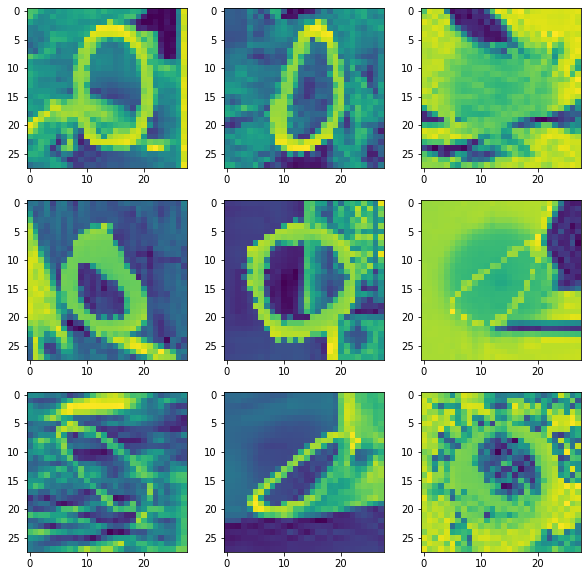

In [6]:
#Visualizing some of the data
fig,ax = plt.subplots(3,3,figsize = (10,10))
i = 0
index = 0
for image in X_data[:9,:]:
    ax[index,i].imshow(image.reshape(28,28))
    if i == 2:
        index += 1
        i = 0
        continue
    i += 1

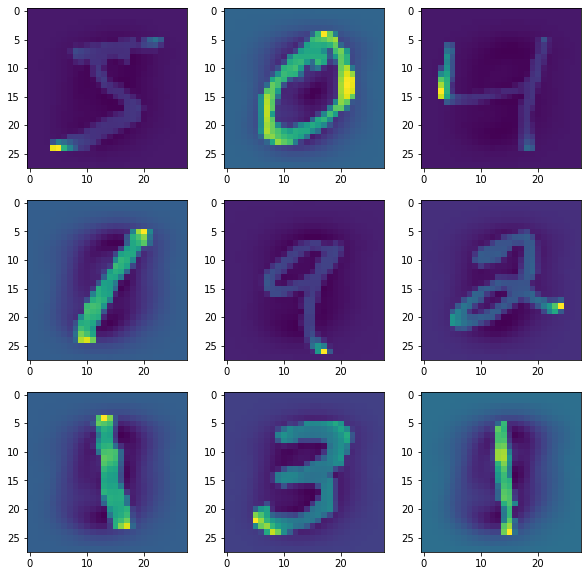

In [7]:
#Visualizing some of the data
fig,ax = plt.subplots(3,3,figsize = (10,10))
i = 0
index = 0
scaler_sklearn = StandardScaler()
X_data_sklearn = scaler_sklearn.fit_transform(X_data_sklearn)
for image in X_data_sklearn[:9,:]:
    ax[index,i].imshow(image.reshape(28,28))
    if i == 2:
        index += 1
        i = 0
        continue
    i += 1

The data is imbalanced with decreasing labels as the label increases. Hence Random Oversampling will be used to rebalance the dataset

In [8]:
ros = RandomOverSampler()
X_data,y_data = ros.fit_resample(X_data,y_data)

Text(0.5, 1.0, 'SkLearn datset')

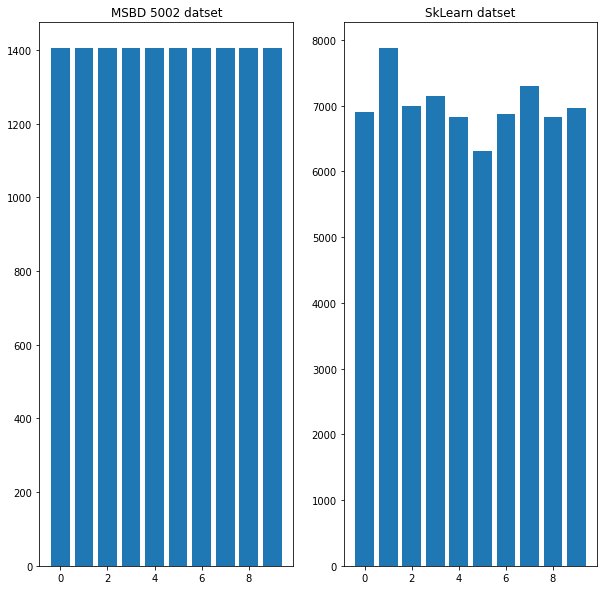

In [9]:
fig,ax_bar = plt.subplots(1,2,figsize = (10,10))
ax_bar[0].bar(Counter(y_data).keys(),[Counter(y_data)[i] for i in Counter(y_data).keys()])
ax_bar[1].bar(Counter(y_data_sklearn).keys(),[Counter(y_data_sklearn)[i] for i in Counter(y_data_sklearn).keys()])
ax_bar[0].set_title("MSBD 5002 datset")
ax_bar[1].set_title("SkLearn datset")

Dataset is completely balanced now

In [80]:
#split the dataset into a test set and a (Training + validation) set
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
#split the (Training + validation) set into a Training and Validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2,random_state=42)

<h2>Building a Neural Network using the Keras Sequential API</h2>
The Sequential API in keras is the simplest model available in Keras, where we create a single stack of layers. It is equivalent to creating a linear stack  in Pytorch with nn.Linear() layers

In [81]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [82]:
model_one = keras.models.Sequential([
    keras.layers.Input(shape = [784]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(400,kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(300,kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100,kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10,activation = "softmax")
])

#compiling the model
optimizer = keras.optimizers.Adam(lr = 0.001,beta_1=0.9,beta_2=0.999)
model_one.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer,metrics = ["accuracy"])
#creating a checkpoint object to allow saving of models
checkpoint_modelone = keras.callbacks.ModelCheckpoint("model_one.h5",save_best_only=True)
#create a early stopping object
#early_stopping_modelone = keras.callbacks.EarlyStopping(patience = 10,restore_best_weights=True)
history_model_one = model_one.fit(X_train, y_train, epochs=60,validation_data=(X_valid, y_valid),callbacks = [checkpoint_modelone])

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/60
281/281 [==============================] - 21s 69ms/step - loss: 1.9122 - accuracy: 0.3186 - val_loss: 1.7680 - val_accuracy: 0.3759
Epoch 2/60
281/281 [==============================] - 2s 8ms/step - loss: 1.6096 - accuracy: 0.4282 - val_loss: 1.7189 - val_accuracy: 0.4106
Epoch 3/60
281/281 [==============================] - 2s 8ms/step - loss: 1.4264 - accuracy: 0.4988 - val_loss: 1.5582 - val_accuracy: 0.4702
Epoch 4/60
281/281 [==============================] - 2s 8ms/step - loss: 1.2517 - accuracy: 0.5744 - val_loss: 1.4194 - val_accuracy: 0.5258
Epoch 5/60
281/281 [==============================] - 2s 8ms/step - loss: 1.0948 - accuracy: 0.6348 - val_loss: 1.3734 - val_accuracy: 0.5503
Epoch 6/60
281/281 [==============================] - 2s 8ms/step - loss: 0.9569 - accuracy: 0.6797 - val_loss: 1.3949 - val_accuracy: 0.5681
Epoch 7/60
281/281 [==============================] - 2s 9ms/step - loss: 0.8275 - accuracy: 0.7309 - val_loss: 1.2934 - val_accuracy: 0.6134
Epoc

The above neural network achieves an accuracy of 0.98 on the training set and on the validation set, it has an accuracy of 0.6966. 

In [83]:
#accuracy on testset
model_one.evaluate(X_test,y_test)

88/88 [==============================] - 1s 4ms/step - loss: 2.1407 - accuracy: 0.7014


[2.140740394592285, 0.7014234662055969]

<h2>Building a model with Convolutional Layers in it</h2>

This model contains 3 convolutional layers at the start, followed by a pooling layer where the units in each layer will take the maximum value of its rectangular receptive field of the previous layer. Afterwards it is flattened and fed to a normal Dense layer 

In [64]:
#data needs to be reshaped to be used for a convolutional network input
#as convolutional networks require an input of the form (height,width,channel), the data
#is reshaped. Note that tensorflow will add in a default batch dimension
#so the final input will be (batch,height,width,channels)
X_train_reshaped = np.array(list(map(lambda x:x.reshape(28,28,1),X_train)))
X_valid_reshaped = np.array(list(map(lambda x:x.reshape(28,28,1),X_valid)))
X_test_reshaped = np.array(list(map(lambda x:x.reshape(28,28,1),X_test)))

In [66]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv2D(20,kernel_size = 3,padding = "SAME", activation = "elu"),
    keras.layers.Conv2D(64,kernel_size = 3,padding = "SAME", activation = "elu"),
    keras.layers.Conv2D(128,kernel_size = 3, padding = "SAME", activation = "elu"),
    keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation = "softmax")
])

optimizer_cnn = keras.optimizers.Adam(lr = 0.001,beta_1=0.9,beta_2=0.999)
model_cnn.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer_cnn,
metrics = "accuracy")
checkpoint_modelcnn = keras.callbacks.ModelCheckpoint("model_cnn.h5",save_best_only=True)
history_model_cnn = model_cnn.fit(X_train_reshaped,y_train, epochs=30,validation_data=(X_valid_reshaped,y_valid),callbacks = [checkpoint_modelcnn])

Epoch 1/30
281/281 [==============================] - 11s 22ms/step - loss: 1.8086 - accuracy: 0.3744 - val_loss: 1.4999 - val_accuracy: 0.4871
Epoch 2/30
281/281 [==============================] - 6s 21ms/step - loss: 1.1842 - accuracy: 0.5993 - val_loss: 1.1684 - val_accuracy: 0.6063
Epoch 3/30
281/281 [==============================] - 6s 21ms/step - loss: 0.8764 - accuracy: 0.7151 - val_loss: 0.9910 - val_accuracy: 0.6868
Epoch 4/30
281/281 [==============================] - 6s 21ms/step - loss: 0.6624 - accuracy: 0.7859 - val_loss: 0.9845 - val_accuracy: 0.7011
Epoch 5/30
281/281 [==============================] - 6s 20ms/step - loss: 0.4703 - accuracy: 0.8491 - val_loss: 0.9511 - val_accuracy: 0.7215
Epoch 6/30
281/281 [==============================] - 5s 19ms/step - loss: 0.3540 - accuracy: 0.8846 - val_loss: 0.9431 - val_accuracy: 0.7424
Epoch 7/30
281/281 [==============================] - 5s 19ms/step - loss: 0.2398 - accuracy: 0.9273 - val_loss: 0.9160 - val_accuracy: 0.757

In [67]:
model_cnn.evaluate(X_test_reshaped,y_test)

88/88 [==============================] - 1s 11ms/step - loss: 1.3572 - accuracy: 0.7658


[1.3571566343307495, 0.7658362984657288]

In [73]:
#using the entire dataset from earlier to predict on the cnn model. 
X_data_predict = imagespixeldf.iloc[:,:-1]
y_data_predict = imagespixeldf.iloc[:,-1]
y_data_predict = np.array([int(i) for i in y_data_predict.tolist()])
scaler = StandardScaler()
X_data_predict = scaler.fit_transform(X_data_predict)
X_data_predict_reshaped = np.array(list(map(lambda x:x.reshape(28,28,1),X_data_predict)))
y_pred = model_cnn.predict(X_data_predict_reshaped)

In [77]:
final_result = np.argmax(y_pred,axis = 1)
final_result

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_data_predict,final_result)

array([[1098,    1,   25,   10,    2,    5,   18,   14,    4,    6],
       [   2, 1327,   16,   10,   17,    7,    3,    9,   13,    1],
       [  47,   30, 1008,   20,   22,    9,   14,   23,   18,    3],
       [  21,   21,   45, 1070,    9,   55,   16,    3,   20,    2],
       [  13,   20,   28,   12,  956,   24,   14,   38,   14,   16],
       [  13,    6,    7,   35,    9,  852,   11,    4,   14,   11],
       [  17,    8,    8,    7,   21,   11,  673,    7,    7,   19],
       [   5,    4,   11,    0,   20,    1,    3,  553,    2,    1],
       [   1,    3,    3,    1,    4,    5,    2,    0,  421,    1],
       [   0,    0,    0,    0,    2,    1,    5,    2,    0,  299]],
      dtype=int64)

In [79]:
pd.DataFrame({'No:':list(range(final_result.shape[0])),'Result':final_result}).to_csv('Q3 predicted results.csv')

As shown above, the above model achieves an accuracy of 71% on the test set. Not so good